In [89]:
import seaborn as sb
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets

import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.utils.multiclass import type_of_target
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from xgboost import XGBClassifier
from pprint import pprint

In [90]:
# Load the CSV file into a pandas DataFrame.
df = pd.read_csv('/content/winequality-white.csv', header=0, sep=';', dtype={
    'fixed acidity': 'float64',
    'volatile acidity': 'float64',
    'citric acid': 'float64',
    'residual sugar': 'float64',
    'chlorides': 'float64',
    'free sulfur dioxide': 'float64',
    'total sulfur dioxide': 'float64',
    'density': 'float64',
    'pH': 'float64',
    'sulphates': 'float64',
    'alcohol': 'float64',
    'quality': 'int32',
})
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 440.2 KB


In [92]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int32
dtype: object

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [94]:
df.sum()

fixed acidity            33574.75000
volatile acidity          1362.82500
citric acid               1636.87000
residual sugar           31305.15000
chlorides                  224.19300
free sulfur dioxide     172939.00000
total sulfur dioxide    677690.50000
density                   4868.74609
pH                       15616.13000
sulphates                 2399.27000
alcohol                  51498.88000
quality                  28790.00000
dtype: float64

In [95]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

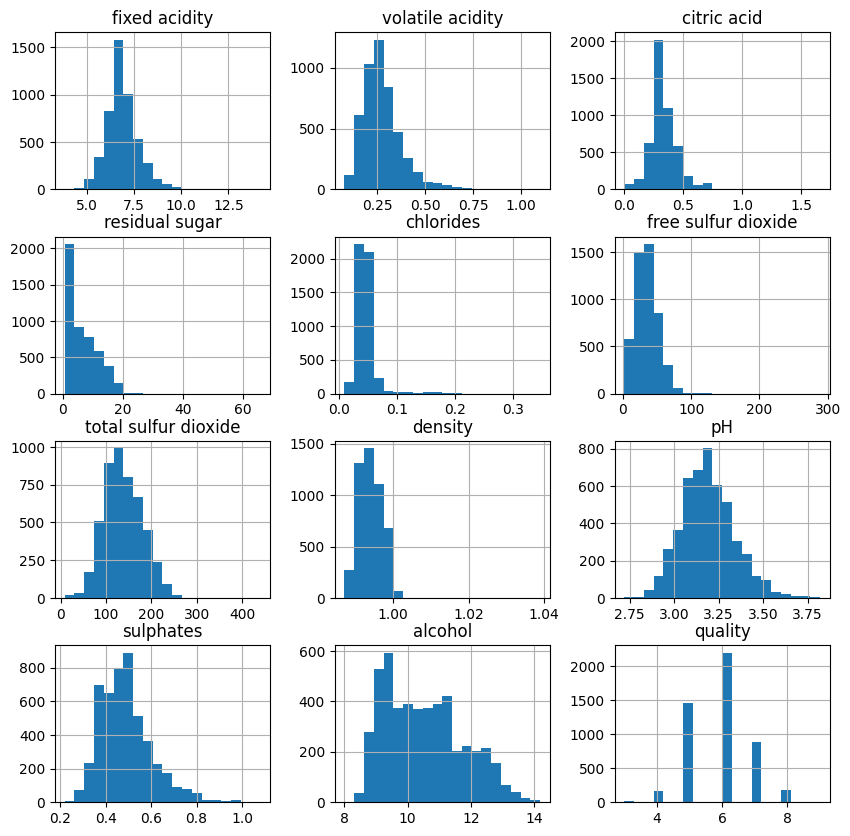

In [96]:
df.hist(bins=20, figsize=(10, 10))

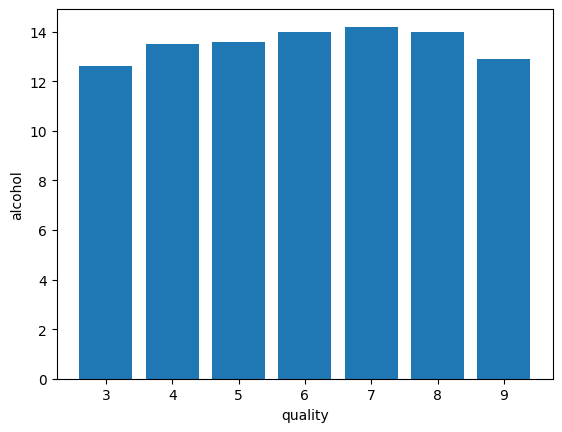

In [97]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

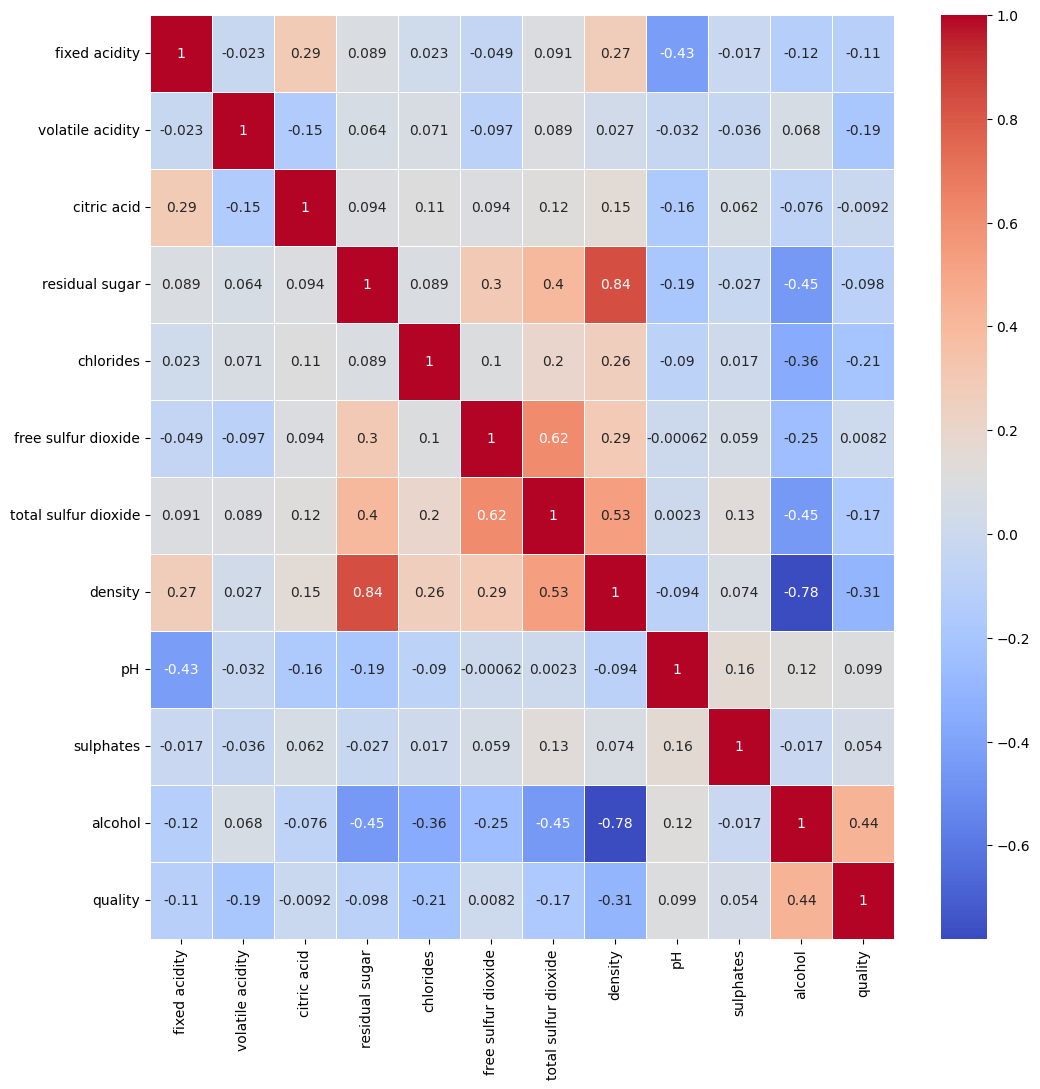

In [98]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr(), linewidths=0.5, annot=True, cmap="coolwarm")
plt.show()

In [99]:
df = df.drop('density', axis=1)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>],
       [<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>, <Axes: >]], dtype=object)

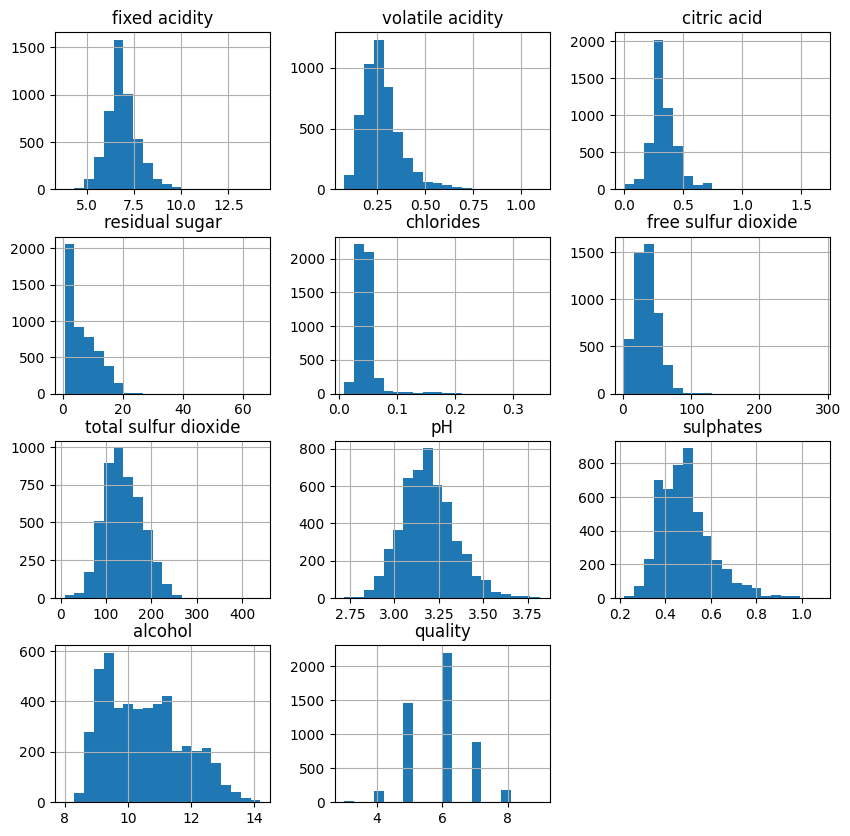

In [100]:
df.hist(bins=20, figsize=(10, 10))

In [101]:
df['high quality'] = [1 if x > 6 else 0 for x in df.quality]

In [102]:
features = df.drop(['quality', 'high quality'], axis=1)
target = df['high quality']

In [103]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape

((3918, 10), (980, 10))

In [104]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [105]:
models = [LogisticRegression(), BayesianRidge(), XGBClassifier(), SVC(kernel='rbf', probability=True)]

for i in range(4):
    models[i].fit(xtrain, ytrain)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, models[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.5978566903571284
Validation Accuracy :  0.6036479708162336

BayesianRidge() : 
Training Accuracy :  0.779500401473417
Validation Accuracy :  0.7825930992552059

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.99596158

In [106]:
print(metrics.classification_report(ytest, models[0].predict(xtest)))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       765
           1       0.64      0.25      0.36       215

    accuracy                           0.80       980
   macro avg       0.73      0.60      0.62       980
weighted avg       0.78      0.80      0.77       980



In [108]:
print(metrics.classification_report(ytest, models[2].predict(xtest)))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       765
           1       0.77      0.64      0.70       215

    accuracy                           0.88       980
   macro avg       0.84      0.79      0.81       980
weighted avg       0.87      0.88      0.88       980



In [109]:
print(metrics.classification_report(ytest, models[3].predict(xtest)))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       765
           1       0.66      0.27      0.39       215

    accuracy                           0.81       980
   macro avg       0.74      0.62      0.64       980
weighted avg       0.79      0.81      0.78       980

